https://bit.ly/FEML-2-CLS

## Классификация. Логистическая регрессия и SVM

<p style="align: center;"><img align=center src="https://sun9-3.userapi.com/impg/rMxsV1l3x_NgXZnO2BR_Z_vQ5CMfAysGMkpVrg/5vII3kSwywk.jpg?size=1233x403&quality=96&proxy=1&sign=607ece16ae211ad91d8c9a1ba285c822&type=album"  width=900></p>

## Некоторые важные определения
* **Classification** - is a type of supervised learning where the goal is to classify or categorize input data into one of several predetermined classes. Metrics- `accuracy, precision, recall, and F1 score.`
* **Logistic regression** is a statistical method used for modeling the relationship between a categorical dependent variable and one or more independent variables. 
    <li><b>Метод опорных векторов (англ. SVM)</b>  - поиск тем или иным способом разделяющей гиперплоскости между классами.</li>
    <li><b>Сигмоида (логистическая функция)</b>  - гладкая монотонная возрастающая нелинейная функция, которая часто применяется для «сглаживания» значений некоторой величины.</li>



<h1><u>План урока</u></h1>

<p><font size="3" face="Arial">
<ul type="square"><a href="#1"></a>
    <li><a href="#1">Логистическая регрессия</a></li>
        <ul>
            <li><a href="#2">Теория. Масимизация правдоподобия</a></li>
            <li><a href="#3">Практика. Регрессия "из коробки"</a></li>    
    </ul>
    
    
    
   

<li><a href="#4">Метод опорных векторов. SVM.</a></li>
<ul><li><a href="#5">Теория. Проблема линейной неразделимости. Ядра</a></li>
            <li><a href="#6">Практика. Задача разделения ирисов Фишера</a></li>    
    </ul>


</ul></font></p>

## Logistic regression

In logistic regression, the **dependent variable** is usually `binary or dichotomous`, meaning it has only two possible outcomes, such as yes or no, true or false, success or failure, etc. The independent variables can be continuous or categorical, but they are usually numeric.

The logistic regression model estimates the probability of the dependent variable being in a particular category based on the values of the independent variables.  
It uses a logistic function, also known as the `sigmoid function`, to map the continuous input values to a probability score between `[0 and 1]`.

The logistic function has the following formula:

$$ p = \frac{1}{1 + e^{-z}}$$

where $p$ is the probability of the dependent variable being in a certain category,  
$z$ is a linear combination of the independent variables, and  
$e$ is the mathematical constant known as Euler's number.

The logistic regression model estimates the values of the coefficients that maximize the likelihood of observing the data given the model. This is done using maximum likelihood estimation or some other optimization algorithm.

Logistic regression is a popular method for binary classification tasks such as spam detection, fraud detection, and disease diagnosis. It can also be extended to handle **multi-class classification** problems using techniques such as `one-vs-all` and `softmax regression`.




Рассмотрим задачу логистической регрессии. В данной задаче ключевую роль играет функция $\sigma$ (логистическая функция), которая используется для прогнозирования вероятности возникновения некоторого события по значениям множества признаков:  

$$\sigma (z) = \frac{1}{1+e^{-z}}\text{  ,  } z \in (-\infty, +\infty) \text{  ,  } \sigma(z) \in (-1, 1)$$
<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Logistic-curve.png"  width=400></p>

Как и в задаче линейной регрессии задаем аргумент
$z=\theta^{T}x = \theta_{0} + \theta_{1}x_{1} + ... + \theta_{n}x_n$, где $\theta_{i}$ - параметры модели (веса), а $x_i$ - известные нам признаки.
### Теория. Масимизация правдоподобия
Чтобы модель могла обучаться, ей необходимо получать "штраф" за то, что она ошибается. Подбираем такой параметр $\theta$, чтобы наша функция правдоподобия $L(\theta)$ была максимальной:
$$\hat{\theta} = argmax_{\theta}L(\theta) = argmax_{\theta} \prod\limits^{m}_{i=1}P(y=y_{i} | x = x_i)$$

После логарифмирования получаем: 
$$logL(\theta)=\sum\limits_{i=1}^mlogP(y=y_i | x=x_i) = \sum\limits_{i=1}^m y_i logf(\theta^Tx_i) + (1-y_i)log(1-f(\theta^Tx_i))$$
где $y_i$ - индикаторная переменная. Если предсказание верно - $y_i = 1$, то в сумме остается только первый член, а если нет, то второй.

### Практика. Регрессия "из коробки"
<p id="3">Решаем задачу о предсказании пола спортсмена.</p>

In [286]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

In [287]:
# датасет - https://www.kaggle.com/rio2016/olympic-games
# data = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/athletes.csv')
data = pd.read_csv('/Users/velo1/SynologyDrive/GIT_syno/Data/athletes.csv', delimiter = ',')

data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [288]:
# save data locally
# data.to_csv("/Users/velo1/SynologyDrive/GIT_syno/Data/athletes.csv", index = False) # False - to avoid new index column

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [290]:
data.isna().sum() # summurize boolean mask column wise

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

<p>Сделаем предобработку данных нашего датасета. Найдем и удалим пустые строчки нашего датасета</p>

In [291]:
# rows with Nans
data[data['height'].isna()].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [292]:
# удаляем ячейки с отсутствием данных
data = data[~(data['height'].isna())]
data = data[~(data['weight'].isna())]

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [294]:
data.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

<div class="alert alert-info"><p> Далее используем популярную библиотеку <b>scikit-learn</b> для классического машинного обучения. Для дополнительного изучения всю документацию можете найти на <a href="https://scikit-learn.org/stable/">сайте</a>. Она умеет довольно неплохо решать множество задач машинного обучения, но чаще всего испольузется для обучения, а не для конкретных задач.</p></div>

In [295]:
from sklearn.linear_model import LogisticRegression

#### <p style="align: center;">Шаг 1 Предобработка данных.


In [296]:
# попробуем выбрать какие-нибудь признаки, для начала
df_selectedColumns = data[['height','weight', 'sport']]

In [297]:
df_selectedColumns['sport'].value_counts()

athletics            2187
aquatics             1396
football              583
rowing                535
cycling               502
hockey                432
volleyball            382
shooting              380
judo                  377
sailing               372
wrestling             349
handball              349
canoe                 327
gymnastics            319
rugby sevens          296
basketball            284
weightlifting         258
fencing               245
equestrian            215
tennis                191
table tennis          168
badminton             164
archery               126
taekwondo             125
golf                  115
triathlon             109
modern pentathlon      72
Name: sport, dtype: int64

Типы данных https://youtu.be/c4Cg3TUIH0E


 Для работы с переменными в рамках задачи <b><i>Логистической регрессии</i></b> нужно преобразовать категориальные переменные в числа. Например, вот так

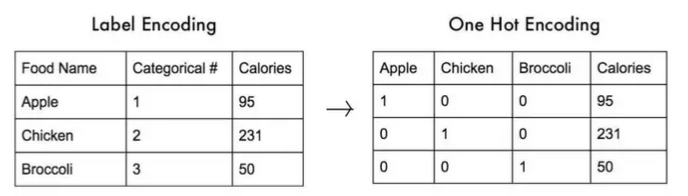

In [298]:
df_selectedColumns.head()

,height,weight,sport
0,1.72,64.0,athletics
1,1.68,56.0,fencing
2,1.98,79.0,athletics
3,1.83,80.0,taekwondo
4,1.81,71.0,cycling


In [299]:
# столбец sport - категориальная переменная (не путать с континуальными)
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies(df_selectedColumns, columns=['sport'], drop_first=True, sparse= False)

# столбец sex является целевой переменной, удаляем его из Х
# del X['sex']

print('Пометили вид спорта спортсмена единичкой.')
X.head()

Пометили вид спорта спортсмена единичкой.


,height,weight,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<p>LabelEncoder ставит в соответствие значению пола (женщина, мужчина) 0 и 1 </p>

In [300]:
X.info(memory_usage='deep') # to estimate memory usage with sparse= True

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   height                   10858 non-null  float64
 1   weight                   10858 non-null  float64
 2   sport_archery            10858 non-null  uint8  
 3   sport_athletics          10858 non-null  uint8  
 4   sport_badminton          10858 non-null  uint8  
 5   sport_basketball         10858 non-null  uint8  
 6   sport_canoe              10858 non-null  uint8  
 7   sport_cycling            10858 non-null  uint8  
 8   sport_equestrian         10858 non-null  uint8  
 9   sport_fencing            10858 non-null  uint8  
 10  sport_football           10858 non-null  uint8  
 11  sport_golf               10858 non-null  uint8  
 12  sport_gymnastics         10858 non-null  uint8  
 13  sport_handball           10858 non-null  uint8  
 14  sport_hockey          

In [301]:
# df_selectedColumns.head()

In [302]:
# целевая переменная (столбец sex) снова является категориальной 
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder


In [303]:
# Encode target labels with value between 0 and n_classes-1.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder
le = LabelEncoder()

le.fit(data['sex'])

LabelEncoder()

In [304]:
le.classes_

array(['female', 'male'], dtype=object)

In [305]:
le.transform(['male', 'female', 'male']) # пример расшифровки

array([1, 0, 1])

In [306]:
le.inverse_transform([1, 0, 1])

array(['male', 'female', 'male'], dtype=object)

In [307]:
# записываем в таргетную переменную y преобразованный столбец sex

y = pd.Series(data= le.transform(data['sex']))
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

Масштабирование данных (StandartScaler) https://youtu.be/XsuCOfpf8Ic


**Нормализация** - MinMaxScaler() Для каждой фичи x делает:
$$\frac{x_i - min}{max - min}$$
После нормализации признак будет изменяться в диапазоне [0, 1].<br>
Лучше зарекомендовала себя в моделях, которые работают с `расстояниями (KNN).`

<br>

**Стандартизация** - StandardScaler(). Для каждой фичи х делает:
$$\frac{x - mean}{std}$$
После стандартизации у признака будут mean = 0, std = 1.<br>
Лучше зарекомендовала себя в `линейных моделях.`

In [308]:
from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

#### Шаг 2 Обучение.


 Поделим данные на обучающую выборку и тестовую. Указываем в test_size долю датасета, которая пойдет на тестовую выбору

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test.index

Int64Index([  36, 7675, 9226, 6362, 7489, 6263,  742, 9503, 7130, 8835,
            ...
            4140, 3530, 4395, 1512, 5240,  648, 1354, 5099, 8195, 6590],
           dtype='int64', length=3258)

In [310]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [311]:
le.inverse_transform(predictions[:5]) # посмотрим как выглядят наши предсказания

array(['male', 'male', 'female', 'male', 'male'], dtype=object)

In [312]:
model.predict_proba(X_test)

array([[0.28257285, 0.71742715],
       [0.06350163, 0.93649837],
       [0.79374884, 0.20625116],
       ...,
       [0.73211453, 0.26788547],
       [0.7824988 , 0.2175012 ],
       [0.9918497 , 0.0081503 ]])

Метрика accuracy https://youtu.be/CCH-1gJo_z0


<p>Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.</p>

In [313]:
model.score(X_train, y_train) 

0.8163157894736842

In [314]:
model.score(X_test, y_test)

0.8133824432166974

<p>Итак, на данном этапе мы..</p>
<ul><li>познакомились с понятием логистической регерссии</li>
    <li>научились делать предобработку данных датасета</li>
    <li>посмотрели на практике регрессию "из коробки"</li>
</ul>

### Метод опорных векторов. SVM.


SVM https://youtu.be/efR1C6CvhmE
<p id="4">Алгоритм заключается в переводе исходных векторов в пространство более высокой размерности и поиск разделяющей гиперплоскости с максимальным зазором в этом пространстве. Задача - разделить на классы. </p>
<img align=center src="https://wiki.loginom.ru/images/support-vector-machines.svg"  width=600></p>

$$r = y\frac{w^Tx +b}{||w||}$$
Здесь $w$ - это веса, $x$ - признаки.
Данная задача аналитически решается методом множителей Лагранжа. 
$$L(w,b;\lambda) = \frac{1}{2}||w||^2 - \sum\limits^{n}_{i=1}\lambda_i(c_i((w \cdot x_i) - b)-1) \rightarrow min_{w,b}max_{\lambda}$$
 где $\lambda_i \geq 0, 1 \leq i \leq n$

### Теория. Проблема линейной неразделимости.
Возникает проблема линейной неразделимости данных (когда у данных есть выбросы, шум). Если данные линейно неразделимы, то нужно перейти в признаковое пространство большей размерности, где классы уже могут быть разделены линейно.</p>
Записываем скалярное произведение в другом пространстве.  
Ядра могут быть любые. Примеры: 

1. Полиномиальное ядро $k(x,x') = (x \cdot x')^d$
1. Полиномиальное ядро со смещением $k(x,x') = (x \cdot x' + 1)^d$
1. Радиальная базисная функция $k(x,x') = exp (-\gamma ||x-x'||^2)$, для $\gamma > 0$ 
1. Радиальная функция Гаусса $k(x,x') = exp \left(-\frac{||x-x'||^2}{2\sigma^2}\right)$


 <img align=center src="https://sun9-17.userapi.com/impg/WED5z6Jq6sM_D2kQduehRYIsoxaK5L3EZIwQvw/QxBRixWCKlA.jpg?size=1234x527&quality=96&proxy=1&sign=94a6398d0d6250781768375641f441f5&type=album"  width=600></p>
 $\text{ }$

In [315]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(kernel='poly')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='poly'))])

<p>Снова получаем наш скор, для обучающей и тестовой выборок.</p>

In [316]:
clf.score(X_train, y_train) 

0.8103947368421053

In [317]:
clf.score(X_test, y_test)

0.8087783916513198

<p>Без StandardScaler получаем более худший результат:</p>

In [318]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [319]:
svc.score(X_train, y_train)

0.766578947368421

In [320]:
svc.score(X_test, y_test)

0.7740945365254758

### Практика. Задача разделения ирисов Фишера
<p>Рассмотрим последний пример классификации на сегодня. Множественная классификация ирисов Фишера - 3 класса.</p>
<img align=center id="6" src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png"  width=800></p>

In [321]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [322]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [323]:
iris = datasets.load_iris()
iris.feature_names, iris.target_names # значения таргетных перменных

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [324]:
X = iris.data[:,:2] # забираем данные из датасета
Y = iris.target

In [325]:
X.shape, Y.shape

((150, 2), (150,))

In [326]:
model = LogisticRegression() 
model2 = SVC()

model.fit(X, Y)
model2.fit(X, Y)

SVC()

In [327]:
model.score(X, Y)

0.82

In [328]:
model2.score(X, Y)

0.82

In [329]:
import numpy as np
import matplotlib.pyplot as plt

<p>Вот так разделяет регрессия:</p>

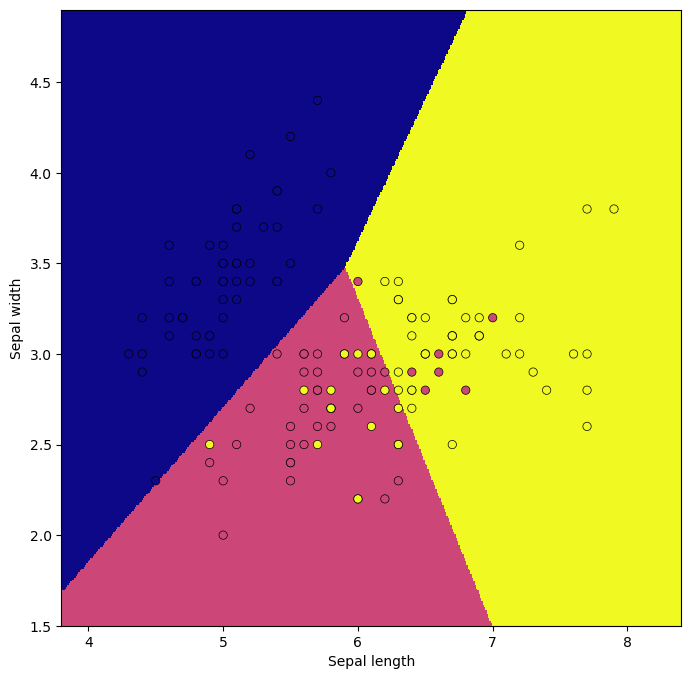

In [330]:
# limit axes ranges
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

# draw mesh
mesh_resolution = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_resolution), np.arange(y_min, y_max, mesh_resolution))

# Z - is na array of predicted labels (0,1,2)
# 
# np.c_ is a function in the NumPy library that is used to concatenate arrays along the second axis (columns).
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])  # ravel()- Return a contiguous flattened array.
# Z = model.predict([*zip(xx.ravel(),yy.ravel())]) # the same
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.plasma)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.plasma,  linewidth=0.5)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

<p>Теперь SVM</p>

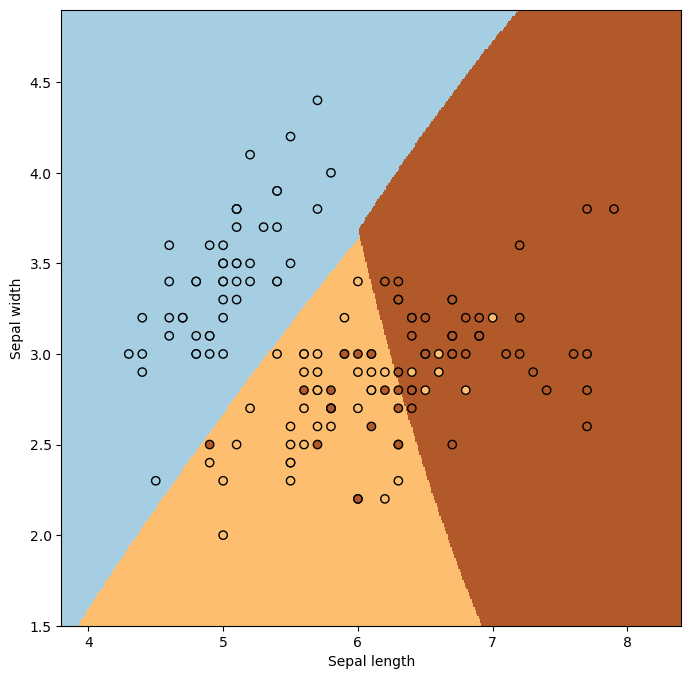

In [331]:
Z = model2.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure( figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

<p>Если хотим нелинейное разделение, то нужно подбирать ядро. Например:</p>

In [332]:
model2 = SVC(kernel='poly', degree=7)
model2.fit(X, Y)

SVC(degree=7, kernel='poly')

In [333]:
model2.score(X, Y)

0.8266666666666667

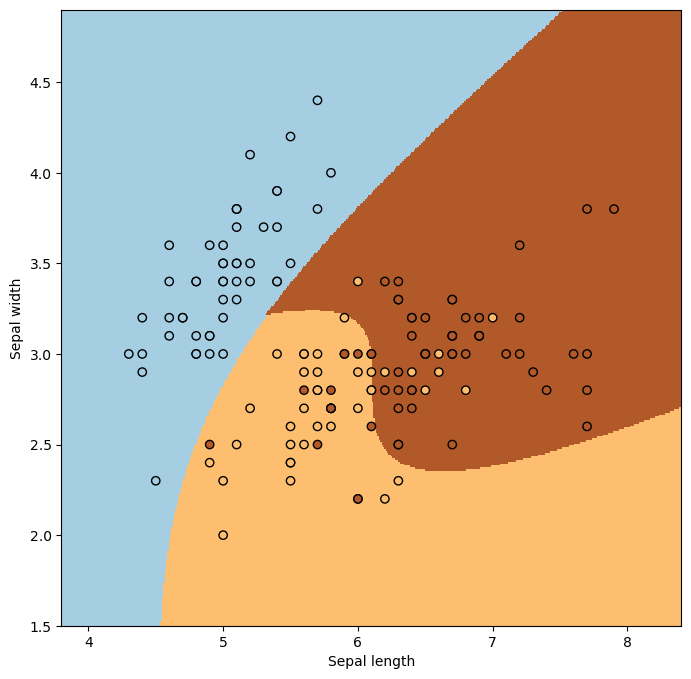

In [334]:
Z = model2.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

<p><h2>Summary</h2>
<font size="3"><p><ul>
    <li>Логистическая регрессия - это модель, используемая для прогнозирования вероятности возникновения некоторого события путём его сравнения с логистической кривой. В данном случае ключевую роль играет сигмоида.</li>
    <ul><li>При работе с логистической регрессией не забываем про предобработку данных: преобразование категориальных переменных в числа, обнуление ячеек датасета, если данные отсутствуют.</li></ul>
    <li>Метод опорных векторов - поиск тем или иным способом разделяющей гиперплоскости между классами.</li>
    <ul><li>При решении данной задачи происходит перевод исходных векторов в пространство более высокой размерности и поиск гиперплоскости с максимальным зазором в этом пространстве. </li>
        <li>Если линейная разделимость невозможна, то подбираем различные ядра для перехода в пр-во большей размерности, где разделение будет уже линейным.</li>
    </ul>


</ul>

</font>
</p>

## **Дополнительные материалы**
1. SVM https://youtu.be/efR1C6CvhmE
2. Типы данных https://youtu.be/c4Cg3TUIH0E
3. Линейные модели классификации и регрессии https://habrahabr.ru/company/ods/blog/323890/
3. Масштабирование данных (StandartScaler) https://youtu.be/XsuCOfpf8Ic
4. Курс «Основы статистики» на Stepik https://stepik.org/course/76/promo
5. Пережёвывая логистическую регрессию https://habr.com/ru/post/485872/
4. Метрика accuracy https://youtu.be/CCH-1gJo_z0
6. Логистическая регрессия https://youtu.be/9BoVCdedvW8
9. Реализация логистической регрессии https://youtu.be/ruVK07YF-RU

<h1>Спасибо за внимание!</h1>